In [30]:
library(tidyverse)
library(ape)
library(phangorn)
library(ggbeeswarm)
library(egg)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
gt_path     <- "/home/brett/work/LineageTracing/BK01_presume1M_dropout_analyses/ground_truth/tip1000000_seed91743010.subtree.nwk"
id_dir      <- "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ids"
gt_dir      <- "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ground_truths"
newicks_dir <- "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/newicks"

# Ground truth tree extraction for different subsamples

In [3]:
tree <- read.tree(gt_path) # full ground truth lineage
tree


Phylogenetic tree with 1000000 tips and 999999 internal nodes.

Tip labels:
  1349_1dc9, 1349_1a79, 1349_1e35, 1349_17ab, 1349_13f4, 1349_13ae, ...
Node labels:
  0.00, 1.00, 3.00, 9.00, 25.00, 35.00, ...

Rooted; includes branch lengths.

In [15]:
for (id_path in list.files(id_dir,pattern=".ids.txt.gz",full.names=T)) {
    print(id_path)
    label <- sub(".ids.txt.gz","",basename(id_path))
    ids <- scan(id_path,character(),quote="")
    subtree <- keep.tip(tree,tip=ids)
    outpath <- file.path(gt_dir,paste0(label,".ground_truth.nwk"))
    write.tree(phy=subtree,outpath)
}

[1] "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ids/PRESUMEBE10k.d00.sample1.ids.txt.gz"
[1] "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ids/PRESUMEBE10k.d00.sample2.ids.txt.gz"
[1] "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ids/PRESUMEBE10k.d00.sample3.ids.txt.gz"
[1] "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ids/PRESUMEBE10k.d10.sample1.ids.txt.gz"
[1] "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ids/PRESUMEBE10k.d10.sample2.ids.txt.gz"
[1] "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ids/PRESUMEBE10k.d10.sample3.ids.txt.gz"
[1] "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ids/PRESUMEBE10k.d20.sample1.ids.txt.gz"
[1] "/home/brett/work/LineageTracing/BK18_extracting_subclades_16MPRESUMEBE/data/ids/PRESUMEBE10k.d20.sample2.ids.txt.gz"
[1] "/home/brett/work/Li

# Tree reconstruction accuracy assessment

In [9]:
df <- tibble(
    sample = as.integer(),
    dropout = as.numeric(),
    tree_type = as.character(),
    accuracy = as.numeric(),
    tree_size = as.integer()
)

for (gt_path in list.files(gt_dir,full.names=T)) {
    label   <- sub(".ground_truth.nwk","",basename(gt_path))
    dropout <- as.numeric(sub("d","",strsplit(label,"\\.")[[1]][2]))/100
    sample  <- as.integer(sub("sample","",strsplit(label,"\\.")[[1]][3]))
    print(label)
    gt <- read.tree(gt_path)
    for (tree_path in list.files(newicks_dir,pattern=label,full.names=T)) {
        # print(tree_path)
        tree_type <- strsplit(basename(tree_path),"\\.")[[1]][4]
        if (tree_type != "complete") {
            tree_type <- "single"
        }
        t <- read.tree(tree_path)
        # print(RF.dist(gt,t,normalize=T))
        suppressMessages(nrfd <- RF.dist(keep.tip(gt,tip=t$tip.label),t,normalize=T))
        df <- df %>% 
            add_row(
                sample = sample,
                dropout = dropout,
                tree_type = tree_type,
                accuracy = (1-nrfd)*100,
                tree_size = length(t$tip.label)
            )
    }
}
head(df)
dim(df)

[1] "PRESUMEBE10k.d00.sample1"
[1] "PRESUMEBE10k.d00.sample2"
[1] "PRESUMEBE10k.d00.sample3"
[1] "PRESUMEBE10k.d10.sample1"
[1] "PRESUMEBE10k.d10.sample2"
[1] "PRESUMEBE10k.d10.sample3"
[1] "PRESUMEBE10k.d20.sample1"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d20.sample2"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d20.sample3"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d30.sample1"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d30.sample2"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d30.sample3"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d40.sample1"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d40.sample2"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d40.sample3"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d50.sample1"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d50.sample2"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


[1] "PRESUMEBE10k.d50.sample3"


Warning message in read.tree(tree_path):
“empty character string.”
Warning message in drop.tip(phy, toDrop):
“drop all tips of the tree: returning NULL”


sample,dropout,tree_type,accuracy,tree_size
<int>,<dbl>,<chr>,<dbl>,<int>
1,0,single,2.066205,9320
1,0,single,2.346542,9435
1,0,single,2.243573,9391
1,0,single,2.019970,8920
1,0,single,2.126144,9233
1,0,single,2.663073,9331


[1] 1806    5

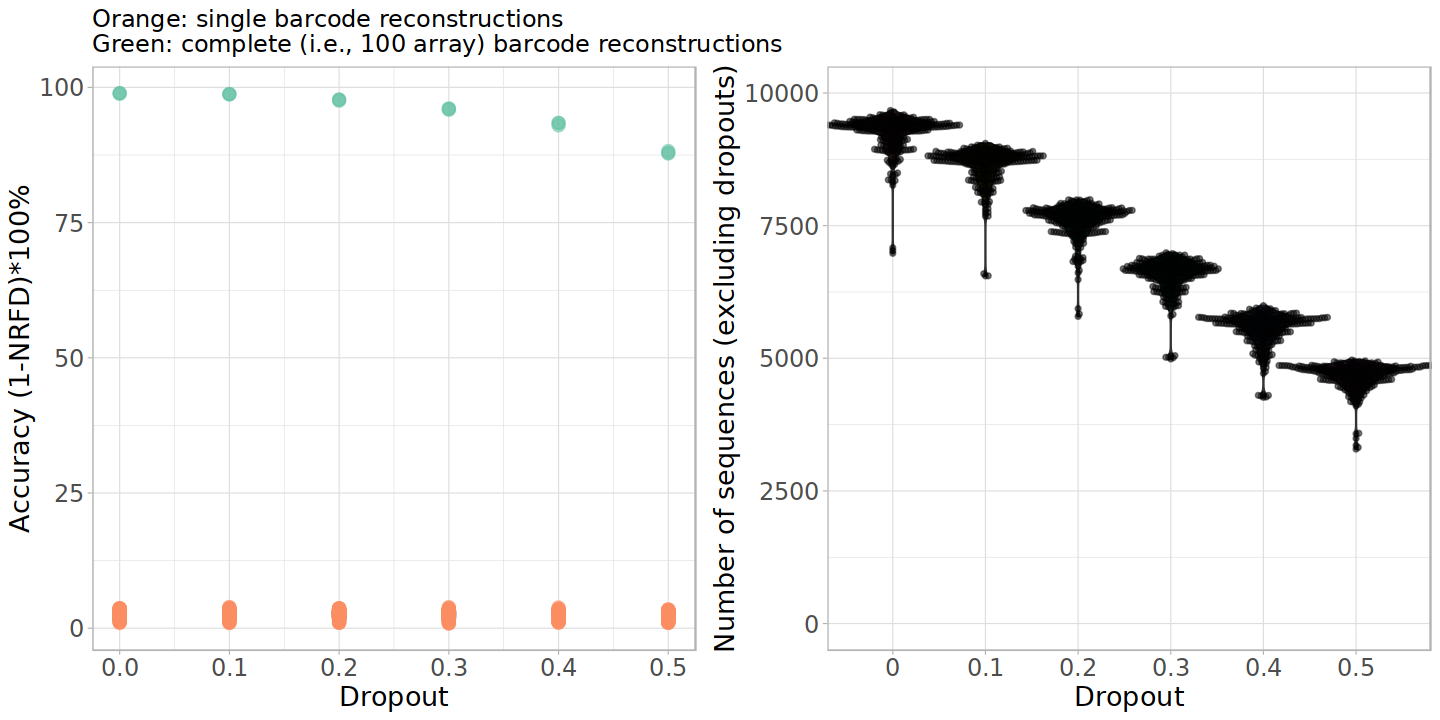

In [42]:
a <- ggplot(df,aes(x=dropout,y=accuracy)) +
    geom_point(aes(color=tree_type),size=3,alpha=0.5) +
    scale_color_brewer(palette="Set2") +
    theme_light() + theme(
        axis.text = element_text(size=14),
        axis.title = element_text(size=16),
        legend.title = element_text(size=16),
        legend.text = element_text(size=14),
        legend.position = "none",
        plot.subtitle = element_text(size=14)
    ) +
    labs(x="Dropout",y="Accuracy (1-NRFD)*100%",subtitle="Orange: single barcode reconstructions\nGreen: complete (i.e., 100 array) barcode reconstructions")

b <- df %>%
    filter(tree_type == "single") %>%
    ggplot(aes(x=factor(dropout),y=tree_size)) +
    geom_violin(aes(fill=factor(dropout))) +
    geom_beeswarm(size=1,cex=0.5,alpha=0.5) +
    theme_light() + theme(
        axis.text       = element_text(size=14),
        axis.title      = element_text(size=16),
        legend.title    = element_text(size=16),
        legend.text     = element_text(size=14),
        legend.position = "none"
    ) +
    scale_y_continuous(limits=c(0,10000)) +
    labs(x="Dropout",y="Number of sequences (excluding dropouts)")

options(repr.plot.width=12,repr.plot.height=6)
ggarrange(a,b,nrow=1)